In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import os

In [11]:
# 设置中文显示
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

                    o          h          l          c         v      SMA_5
t                                                                          
1999-11-18  32.546494  35.765381  28.612303  31.473534  62546300        NaN
1999-11-19  30.713520  30.758226  28.478184  28.880543  15234100        NaN
1999-11-22  29.551144  31.473534  28.657009  31.473534   6577800        NaN
1999-11-23  30.400572  31.205294  28.612303  28.612303   5975600        NaN
1999-11-24  28.701717  29.998211  28.612303  29.372318   4843200  29.962446
1999-11-26  29.238197  29.685265  29.148785  29.461731   1729400  29.560086
1999-11-29  29.327610  30.355865  29.014664  30.132332   4074700  29.810443
1999-11-30  30.042919  30.713520  29.282904  30.177038   4310000  29.551144
1999-12-01  30.177038  31.071173  29.953505  30.713520   2957300  29.971388
1999-12-02  31.294706  32.188843  30.892345  31.562946   3069800  30.409513
1999-12-03  32.144135  32.680614  31.697067  31.831188   3041600  30.883405
1999-12-06  

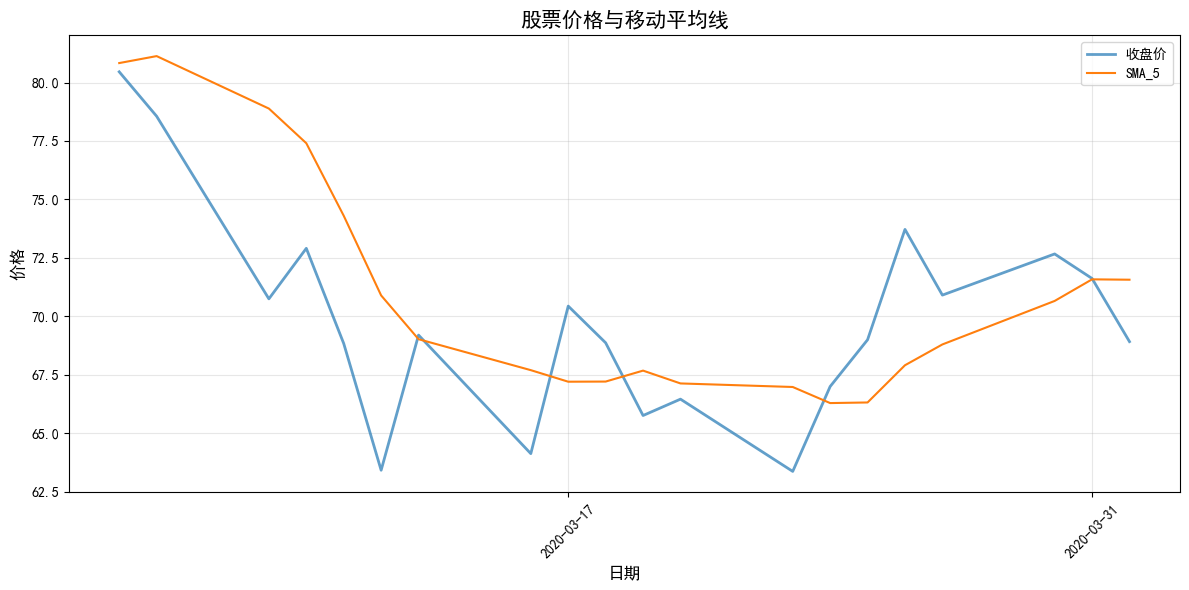

In [15]:
def load_stock_data(file_path):
    """从csv文件加载股票数据"""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"找不到文件: {file_path}")

    # 读取csv文件
    df = pd.read_csv(file_path)

    # 转换日期列为datetime格式并设置为索引
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    df.columns = ['t', 'o', 'h', 'l', 'c', 'v']
    df['t'] = pd.to_datetime(df['t'])
    df.set_index('t', inplace=True)
    return df


def calculate_sma(df, window_size=5):
    """

    :param df:
    :param window_sizes:默认为5
    :return:
    """
    df[f'SMA_{window_size}'] = df['c'].rolling(window=window_size).mean()
    return df


def plot_stock_with_sma(df, title="股票价格与移动平均线", window_size=5):
    """

    :param df:
    :param title:
    :param window_sizes: 默认为5
    :return:
    """
    plt.figure(figsize=(12, 6))

    # 绘制收盘价
    plt.plot(df.index[-20:], df['c'][-20:], label='收盘价', alpha=0.7, linewidth=2)

    # 绘制SMA线
    plt.plot(df.index[-20:],df[f'SMA_{window_size}'][-20:],label=f'SMA_{window_size}',linewidth=1.5)
    # 设置图表标题和标签
    plt.title(title, fontsize=15)
    plt.xlabel('日期', fontsize=12)
    plt.ylabel('价格', fontsize=12)

    # 设置网格和图例
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)

    # 优化日期显示
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    plt.xticks(rotation=45)

    # 调整布局并显示图表
    plt.tight_layout()
    plt.show()

def main():
    # 请修改为您的CSV文件路径
    csv_file_path = "A.csv"  # 替换为您的实际文件路径

    try:
        # 从CSV加载数据
        stock_data = load_stock_data(csv_file_path)

        # 计算SMA
        stock_data = calculate_sma(stock_data, window_size=5)

        # 打印前20行数据
        print(stock_data.head(20))

        # 绘制图表
        plot_stock_with_sma(stock_data, title="股票价格与移动平均线", window_size=5)

    except Exception as e:
        print(f"发生错误: {e}")

if __name__ == '__main__':
    main()